# Instructions

This assignment is provided in the form of a Jupyter notebook. Questions and tasks are posed within this notebook file and you are expected to provide code and/or written answers when prompted. Remember that you can use Markdown cells to format written responses where necessary.

Before submitting your assignment, be sure to do a clean run of your notebook and **verify that your cell outputs (e.g., prints, figures, tables) are correctly shown**. To do a clean run, click *Kernel&#8594;Restart & Restart Kernal and Run All Cells...*.

You are required to submit this notebook to Gradescope in two forms:

1. Submit a PDF of the completed notebook. To produce a PDF, you can use *File&#8594;Save and Export Notebook As...&#8594;HTML* and then convert the HTML file to a PDF using your preferred web browser. **Verify that your code, written answers, and cell outputs are visible in the submitted PDF.**
2. Submit a zip file (including the `.ipynb` file) of this assignment to Gradescope.

# Setup and Imports

These cells will import necessary libraries and configure the notebook's visual style.

In [18]:
# Efficient math and data management
import numpy as np
import pandas as pd

# You may import useful modules and functions from the Python Standard Library.
import os
from functools import reduce  

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Inline figures. Can swap comments to use interactive figures. Use inline figures for assignment submission.
%matplotlib inline
# %matplotlib notebook

In [20]:
# Set seaborn visual style
sns.set()
sns.set_context('talk')
plt.rcParams["patch.force_edgecolor"] = False  # Turn off histogram borders

# Load Data

In this assignment, we will be using the 2017&ndash;2018 NHANES data set. Every year, the CDC conducts a series of interviews and mobile health examinations. The 2017&ndash;2018 data set contains 9,254 completed interviews and 8,704 health examinations obtained from 30 survey locations. This data has been made publicly available and subset of it is included with this assignment. The raw data files can be found in the `nhanes` folder in both CSV and XPORT file formats if you would like to view them. These data files have been processed and combined for you and provided as `NHANES_combined.csv.gz`.

In [21]:
data = pd.read_csv('NHANES_combined.csv.gz', header=0, compression='gzip', low_memory=False, engine='c')

# Challenge

**You may skip this section (all Challenges 0.X) and continue to the "Creating Indicators" Section**.

If you would like experience working directly with the raw NHANES data, follow the prompts below to recreate the data structure provided in `NHANES_combined.csv.gz`. You are responsible for ensuring that your data structure is correct (i.e., validate it against the provied combined data set) if you use it to answer the subsequent prompts.

**Challange 0.1  \[No Credit\]**: Load all of the NHANES data files included with this assignment. The Pandas library can be used to load either file format using `pd.read_csv(filename, header=0)` or `pd.read_sas(filename, encoding='UTF-8')`. Only one set of file types should be loaded. The data is originally provided as SAS XPORT files, but we have also provided them to you as CSV files so that you can easily browse them using programs such as Microsoft Excel.

**Challange 0.2  \[No Credit\]**: View the first ten rows of one of the loaded files (use code) and cross-check the results with the corresping CSV file (in Excel or a text editor) to see if it looks correct.

**Challange 0.3  \[No Credit\]**: Though the data set is distributed across multiple files, it all coresponds to the same set of subjects. Each file contains a `SEQN` column, which is a unique subject identifier that can be matched across various files in the data set. Do any files contain duplicate sequence numbers? (Write code to check.)

*Answer*: 

**Challange 0.4  \[No Credit\]**: Compute the intersection and union of sequence numbers across files. How many subjects are included in the provided subset of NHANES? Are there subjects that appear in every file? Do some subjects appear in some files and not others? (Hint: You may use the `reduce` function in conjunction with numpy's `intersect1d` and `union1d`.)

*Answer*: 

**Challange 0.5 \[No Credit\]**: Working with data across multiple files/variables can be tedious. Luckily, Pandas, much like a relational database, has the ability to join multiple data frames. Use Panada DataFrame's `merge` function to create a unified, single data frame. (Hint: You should specify the `on` keyword. **You should also specify an outer join so that data are not dropped.** Missing values will be represented as `NaN`.)

# Creating Indicators

Now that the data set has been loaded, we can create indicators for two diseases: 1) uncontrolled diabetes and 2) non-alchoholic fatty liver disease (NAFLD). To create these indicators, we need to understand what the data in each column represents and how it is structured. The documentation for each of the files provided in this assignment can be found at the following links:
 - ALQ (Alchohol Use Questionnaire): <https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/ALQ_J.htm>
 - BIOPRO (Standard Biochemistry): <https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BIOPRO_J.htm> 
 - BMX (Body Measures): <https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BMX_J.htm>
 - DEMO (Demographics): <https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.htm>
 - DIQ (Diabetes Questionnaire): <https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DIQ_J.htm>
 - GHB (HbA1c): <https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/GHB_J.htm>
 - HDL (HDL Cholesterol): <https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HDL_J.htm>
 - TRIGLY (Triglycerides and LDL Cholesterol): <https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/TRIGLY_J.htm#LBDLDLN>
 - HEQ (Hepatitis Questionnaire): <https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HEQ_J.htm>
 - LUX (Liver Ultrasound): <https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/LUX_J.htm>

## Uncontrolled Diabetes

We can determine if someone has *uncontrolled* diabetes if the HbA1c (Glycohemoglobin) level in the blood is at least 8%. (Someone who has diabetes but is properly medicated will have a lower HbA1c level, and their diabetes will be considered to be *controlled*.)

**Prompt 1.1 \[1 point\]**: What variable in the data set can be used to determine the blood HbA1c level?

*Answer*: LBXGH

**Prompt 1.2 \[1 point\]**: Compute the percentage of total subjects that received a Glycohemoglobin blood test. (Hint: Missing values are represented as `NaN`.)

In [22]:
hbData = data['LBXGH']
num = hbData.count()/len(hbData)
percentage = num* 100
print('Percentage of total subjects that recieved a Glycohemoglobin blood test: ' +  str(percentage) + '%')

#65.3% of people got tests

Percentage of total subjects that recieved a Glycohemoglobin blood test: 65.32310352280095%


**Prompt 1.3 \[3 points\]**: Do you think there is enough data for analysis? Is the subset of subjects with a blood test representative of the entire data set? What kind of checks might you run to answer these questions?

Compare the distributions of subject ages between the full data set and the subset of subjects who received a blood test. (Use histograms to plot the **density functions**. Make sure you use the same bins and have y-axes with the same scale.) What do you think is going on? How might what you see impact analysis of diabetes? (Consider both Type I and Type II diabetes.)

*Answer*: Yes there is enough data for analysis, there are a high number of people in the dataset. The subset of subjects with a blood test is not representative of the entire set because it does not include patients from around ages 0 to 10. We can run checks such as comparing the density function and checking if any age groups or demographics are left out or has a low probability rate. 

In our graph we have that probabilities for those who have taken a blood test to be 0 for those ages 0 - 10. This may be a result of people having to be a certain age to run the blood tests. This may impact the analysis of diabetes of Type I diabetes since it is a genetic disorder and many of the younger population are not accounted for in the data. In Type II it may impact the analysis less since it is generally developed later in life, but younger generations will still be left out of the analysis which may impact how cures are developed.

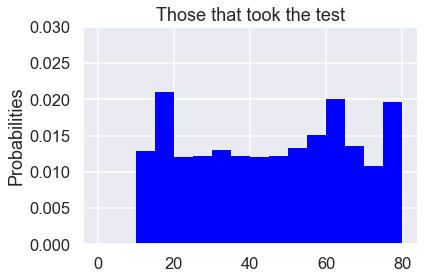

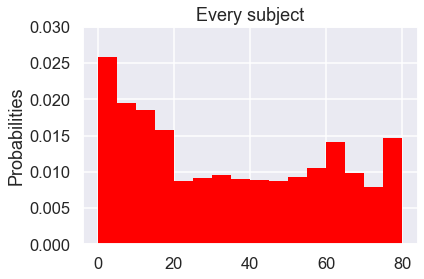

In [23]:
#plot age on x axes and how many people on y axis
fullSet = data['RIDAGEYR']
tookTest = data[data['LBXGH'].notna()]['RIDAGEYR']

interval = list(range(0,85,5))
plt.title('Those that took the test')
plt.ylabel('Probabilities')
plt.ylim(0,0.03)
plt.hist(tookTest, bins = interval, facecolor = 'blue', density = True)
plt.show()

plt.title('Every subject')
plt.ylabel('Probabilities')
plt.ylim(0,0.03)
plt.hist(fullSet, bins = interval, facecolor = 'red', density = True)
plt.show()

**Prompt 1.4 \[1 point\]**: Create a histogram showing the distribution of HbA1c levels. The y-axis should indicate probability density.

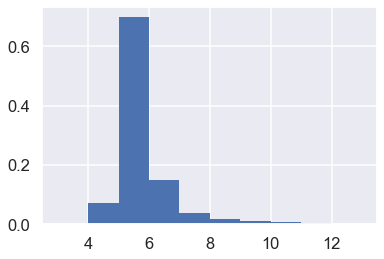

In [24]:
hbData = data['LBXGH'].dropna()
plt.hist(hbData, bins = list(range(3,14,1)), density = True)
plt.show()

**Prompt 1.5 \[1 point\]**: Create an idicator for uncontrolled diabetes.

In [25]:
data['UNCD'] = data['LBXGH'].dropna().apply(lambda x: 'Yes' if x >= 8 else 'No')
#print(data[data['LBXGH'] >= 8]['LBXGH'])
#print(data['UNCD'])


**Prompt 1.6 \[1 point\]**: What percentage of subjects who received a blood test have uncontrolled diabetes?

In [26]:
ans = data[data['UNCD'] == 'Yes']['UNCD'].count()/hbData.count()
percentage = ans*100
print('Percentage of total subjects that recieved a blood test and have uncontrolled diabetes: ' +  str(percentage) + '%')
#Percentage of total subjects that recieved a blood test and have uncontrolled diabetes: 4.168734491315137%

Percentage of total subjects that recieved a blood test and have uncontrolled diabetes: 4.168734491315137%


**Prompt 1.7 \[2 points\]**: What percentage of people with uncontrolled diabetes were previously told that they have diabetes? What conclusions might you draw from this statistic?

*Answer*: Some conclusions we could draw from these statistics is that a large portion of people who are told they have diabetes have a difficult time managing it and diabetes are hard to get under control. 

In [27]:
uncontrolledDiabetes = data[data['UNCD'] == 'Yes']
toldDiabetes = uncontrolledDiabetes[uncontrolledDiabetes['DIQ010'] == 1]
ans = len(toldDiabetes)/len(uncontrolledDiabetes)
percentage = ans*100
print('Percentage of total subjects that have uncontrolled diabetes and were previously told they have diabetes: ' +  str(percentage) + '%')
#87.3015873015873%

Percentage of total subjects that have uncontrolled diabetes and were previously told they have diabetes: 87.3015873015873%


**Prompt 1.8 \[2 points\]**: Create box plots for the body mass index (BMI) of: 1) the total subject population, 2) subjects without uncontrolled diabetes, and 3) subjects with uncontrolled diabetes. What conclusons can you draw from this figure?

*Answer*: We can see that on average subjects with uncontrolled diabetes have a higher BMI than those who don't. This may mean that uncontrolled diabetes is correlated by higher BMI. 

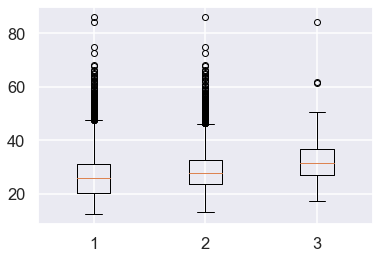

In [28]:
BMI = data['BMXBMI'].dropna()
BMI2 = data[data['UNCD'] == 'No']['BMXBMI'].dropna()
BMI3 = data[data['UNCD'] == 'Yes']['BMXBMI'].dropna()

allData = {'1': BMI, '2': BMI2, '3': BMI3}
fig, ax = plt.subplots()
ax.boxplot(allData.values())
#plt.boxplot(BMI)
#plt.boxplot(BMI2)
#plt.boxplot(BMI3)
plt.show()


**Prompt 1.9 \[2 points\]**: Create a scatter plot of BMI versus HbA1c levels. Use different colors or shapes to differentiate subjects who have previously been told they have diabetes. Draw a horizontal line to indicate the threshold for uncontrolled diabetes.

What conclusions can you draw from this figure?

*Answer*: People who are told they have diabetes typically have higher HbA1c than people who are told they do not have diabetes. 

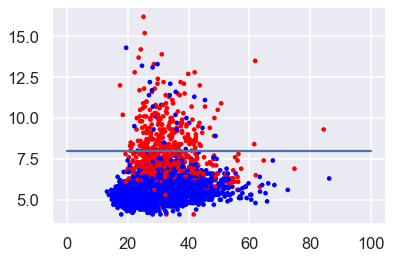

In [29]:
BMI = data['BMXBMI']
hbData = data['LBXGH']
colors = data['DIQ010'].apply(lambda x: 'Red' if x == 1 else 'Blue') #Red means they were told they have it and Blue means they were told they do not have it
plt.scatter(BMI, hbData, s=10, c = colors)
x = [0,100]
y = [8,8]
plt.plot(x,y)
plt.show()

## NAFLD

We can determine if someone has non-alchoholic fatty liver disease (NAFLD) based on the following citeria:
 - Their liver ultrasound has a median controlled attenuated parameter (CAP) greater than $250~dB/m$ and a median stiffness of greater than $7~kPa$.
 - They do not have Hepatitis B nor Hepatits C.
 - No high alchohol intake. (High alchohol intake can be defined as more than 2 drinks per day for men and more than 1 drink per day for women.)

**Prompt 2.1 \[2 points\]**: What variables in the data set can be used to create an indicator for NAFLD?

*Answer*: LUXCAPM (Median CAP) (only missing values), LUXSMED (median stiffness) (only missing values), Hepatitis B indicator: HEQ010 (1 = yes 2 = no, 7 = refused 9 = don't know), Hepatitis C indicator: HEQ030 (1 = yes 2 = no, 7 = refused 9 = don't know), Alcohol per day indicator: ALQ130 (number = how many drinks, 777 = refused 999 = missing), Gender Indicator: DMDHRGND (1 = Male, 2 = Female)

**Prompt 2.2 \[1 points\]**: What percentage of total subjects have enough data to define an indicator for NAFLD? (Hint: Pay close attention to possible questionnaire values. If a subject refused or did not know the answer to the question, then you should treat it is not having enough information.)

In [30]:
allNAFLD = data[['LUXCAPM', 'LUXSMED', 'HEQ010', 'HEQ030', 'ALQ130', 'DMDHRGND']]
defineNAFLD = allNAFLD.dropna()
defineNAFLD = defineNAFLD[(defineNAFLD.HEQ010 != 7) & (defineNAFLD.HEQ010 != 9)] #drop empty values
defineNAFLD = defineNAFLD[(defineNAFLD.HEQ030 != 7) & (defineNAFLD.HEQ030 != 9)]
defineNAFLD = defineNAFLD[(defineNAFLD.ALQ130 != 777) & (defineNAFLD.ALQ130 != 999)]

ans = len(defineNAFLD)/len(allNAFLD)
percentage = ans*100
print('Percentage of subjects that have enough data: ' +  str(percentage) + '%')

Percentage of subjects that have enough data: 35.508969094445646%


**Prompt 2.3 \[2 points\]**: Do you think there is enough data for analysis? Is the subset of subjects with a valid indicator representative of the entire data set?

*Answer*: I think there is enough data for analysis, but the subset of subjects with a valid indicator is not representative of the entire data set. Certain age groups such as young children or babies or poor people may not have enough data on them because of money or testing restrictions. 

**Prompt 2.4 \[2 points\]**: Create an indicator for NAFLD using these variables.

In [31]:
def hasNAFLD(x):
    if ((x.LUXCAPM > 250) and 
        (x.LUXSMED > 7) and 
        (x.HEQ010 == 2) and
        (x.HEQ030 == 2) and 
        (((x.DMDHRGND == 1) and (x.ALQ130 <= 2)) or ((x.DMDHRGND == 2) and (x.ALQ130 <= 1)))):
        return 'Yes'
    else:
        return 'No'
data['NAFLD'] = defineNAFLD.apply(hasNAFLD, axis = 1) #change defineNAFLD to data and 
                                                    #modify hasNAFLD if you don't want 
                                                    #patient without enough info to be NaN



#print(data['NAFLD'])

**Prompt 2.5 \[1 point\]**: What percentage of subjects with a valid indicator for NAFLD have NAFLD?

In [32]:
haveNAFLD = len(data[data['NAFLD'] == 'Yes'])
validIndicator = len(defineNAFLD)
ans = haveNAFLD/validIndicator
percentage = ans*100
print('Percentage of subjects with a valid indicator for NAFLD that have NAFLD: ' +  str(percentage) + '%')

Percentage of subjects with a valid indicator for NAFLD that have NAFLD: 6.3907486305538646%


**Prompt 2.6 \[3 points\]**: Create a plot with three subfigures. The first subfigure should show box plots for the HDL cholesterol of: 1) the total subject population, 2) subjects without NAFLD, and 3) subjects with NAFLD. The second and third subfigures should show box plots for LDL cholesterol and albumin (refrigerated serum), respectively, for the same three groups. Interpret these plots. What conclusions can you draw?

*Answer*: We can see that HDL is lower in those with NAFLD, while LDL is higher, and albumin is lower for those without NAFLD. We can conclude that having NAFLD is correlated with having higher concentrations of certain chemicals in the body.

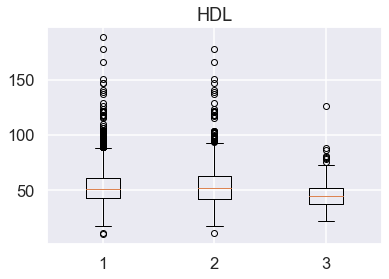

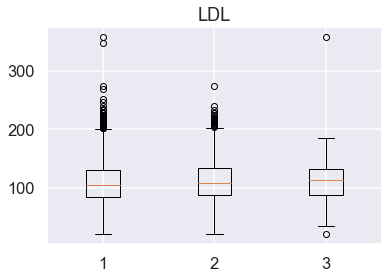

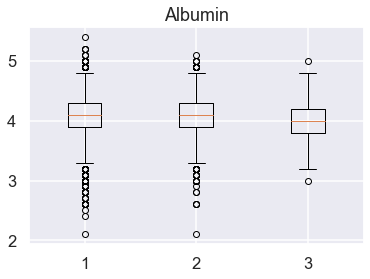

In [33]:
hdlTotal = data['LBDHDD'].dropna()
hdlNoNafld = data[data['NAFLD'] == 'No']['LBDHDD'].dropna()
hdlWithNafld = data[data['NAFLD'] == 'Yes']['LBDHDD'].dropna()

ldlTotal = data['LBDLDLN'].dropna()
ldlNoNafld = data[data['NAFLD'] == 'No']['LBDLDLN'].dropna()
ldlWithNafld = data[data['NAFLD'] == 'Yes']['LBDLDLN'].dropna()

albuminTotal = data['LBXSAL'].dropna()
albuminNoNafld = data[data['NAFLD'] == 'No']['LBXSAL'].dropna()
albuminWithNafld = data[data['NAFLD'] == 'Yes']['LBXSAL'].dropna()

allHDL = {'1' : hdlTotal, '2' : hdlNoNafld, '3': hdlWithNafld}
allLDL = {'1' : ldlTotal, '2' : ldlNoNafld, '3': ldlWithNafld}
allAlbumin = {'1' : albuminTotal, '2' : albuminNoNafld, '3': albuminWithNafld}

fig, ax = plt.subplots()
ax.boxplot(allHDL.values())
plt.title('HDL')
plt.show()

fig2, ax2 = plt.subplots()
ax2.boxplot(allLDL.values())
plt.title('LDL')
plt.show()

fig3, ax3 = plt.subplots()
ax3.boxplot(allAlbumin.values())
plt.title('Albumin')
plt.show()

**Prompt 2.7 \[1 point\]**: Create histograms comparing the probability densities of HDL cholestrol levels for subjects with and without NAFLD. Fine-tune the plotting paramaters so that these histograms are directly comparable. What conclusions can you draw from this comparison?

*Answer*: Both patients with NAFLD as well as the entire population have similar distributions (Gaussian normal distribution), which leads me to believe that HDL levels does not impact whether or not a person has NAFLD

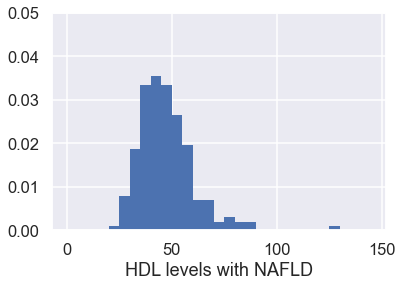

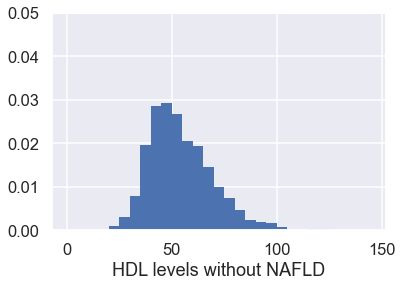

In [34]:
xBin = list(range(0,150,5))
plt.xlabel('HDL levels with NAFLD')
plt.ylim(0,0.05)
plt.hist(hdlWithNafld, bins = xBin, density = True)
plt.show()

plt.xlabel('HDL levels without NAFLD')
plt.ylim(0,0.05)
plt.hist(hdlNoNafld, bins = xBin, density = True)
plt.show()